In [74]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


In [7]:
df = pd.read_csv("Mobile_data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  Price          2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [9]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
Price            0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'Price'],
      dtype='object')

In [18]:
def outliers(x):
    y = x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

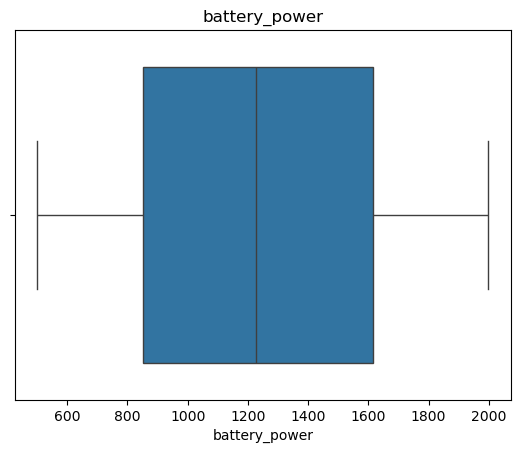

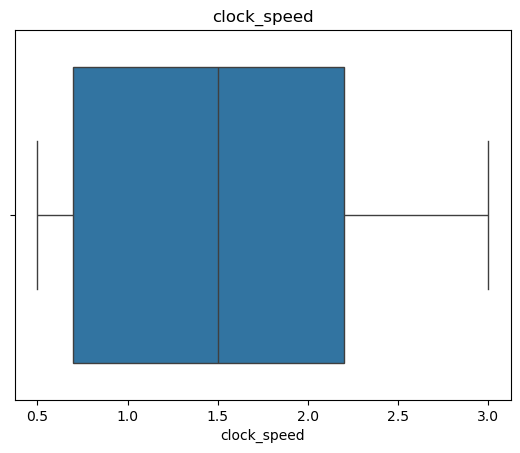

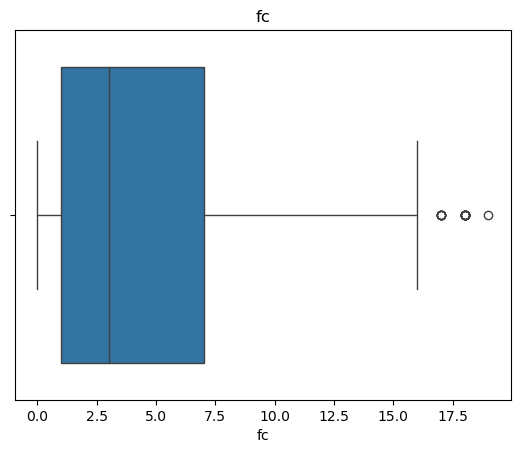

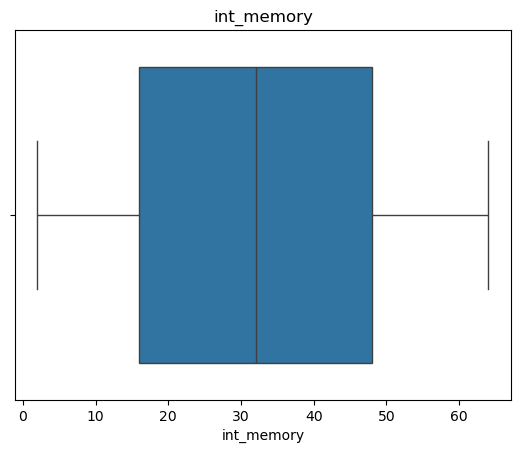

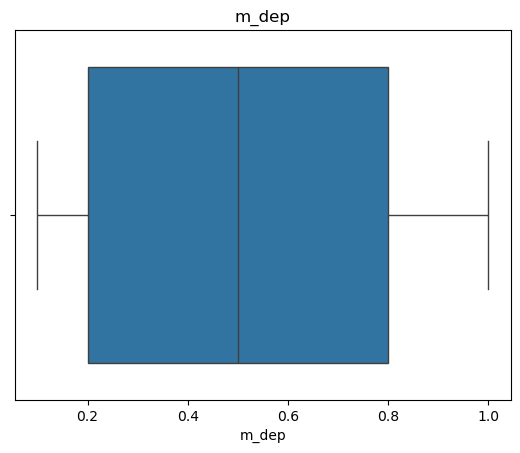

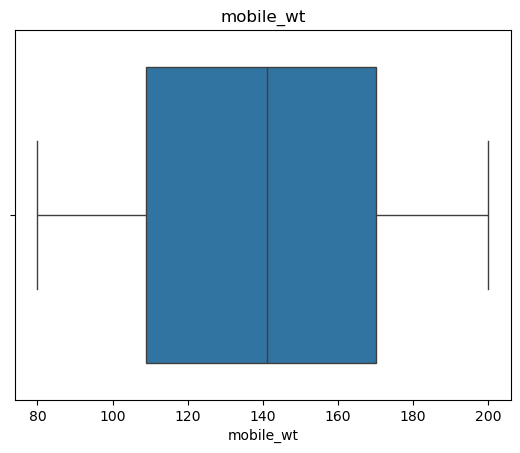

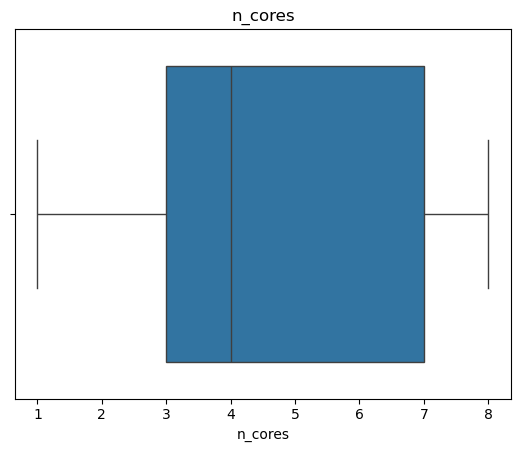

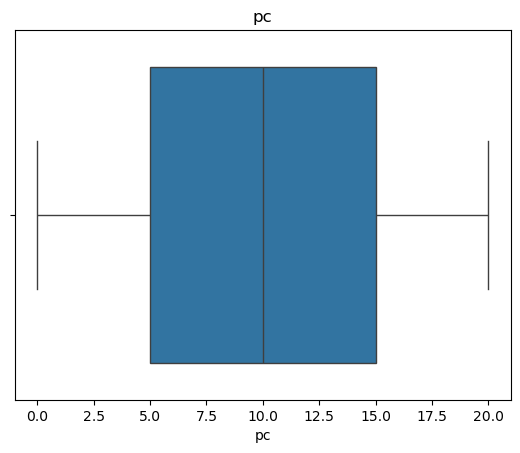

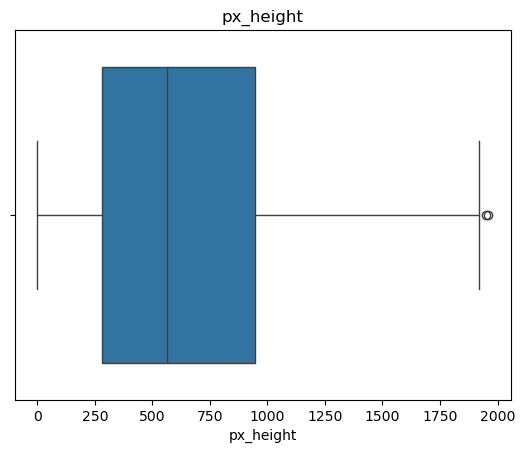

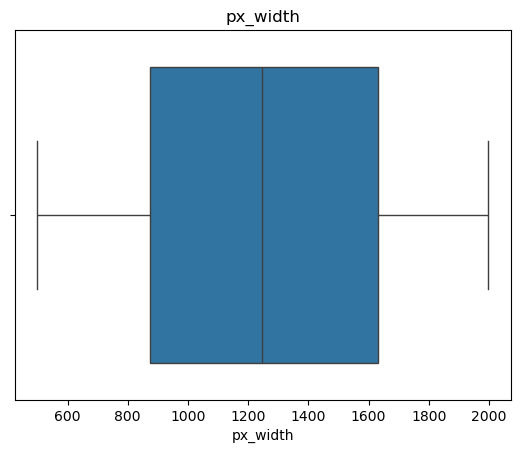

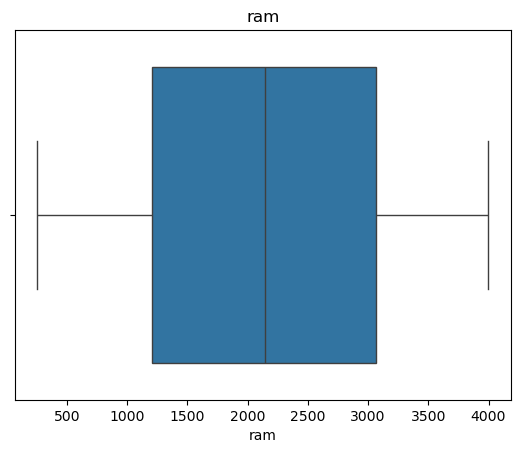

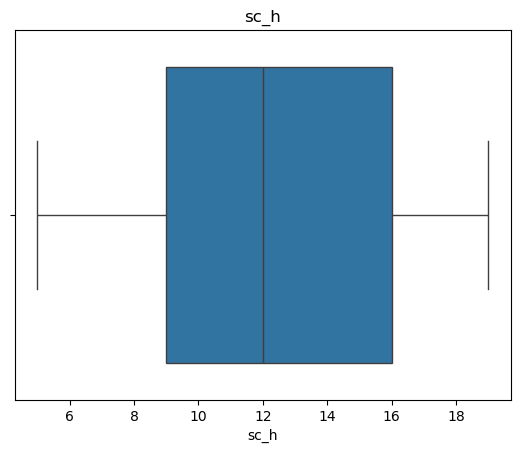

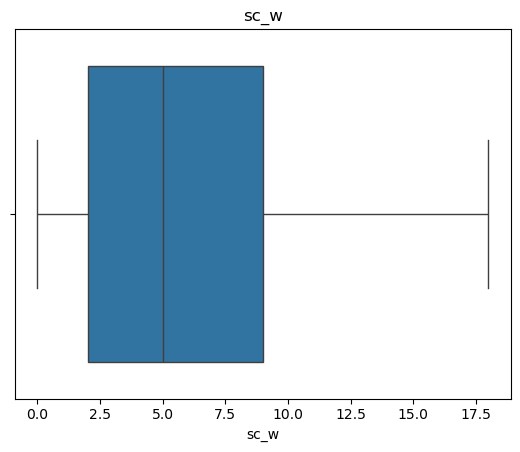

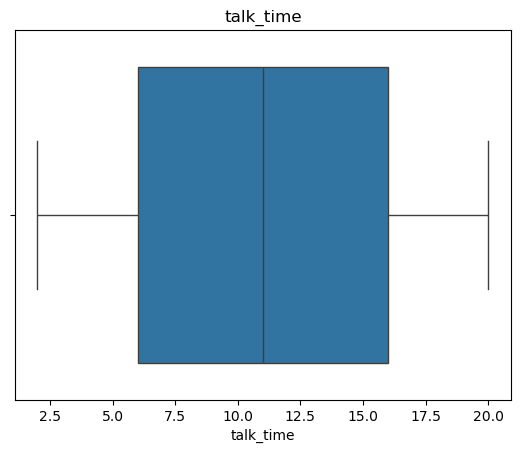

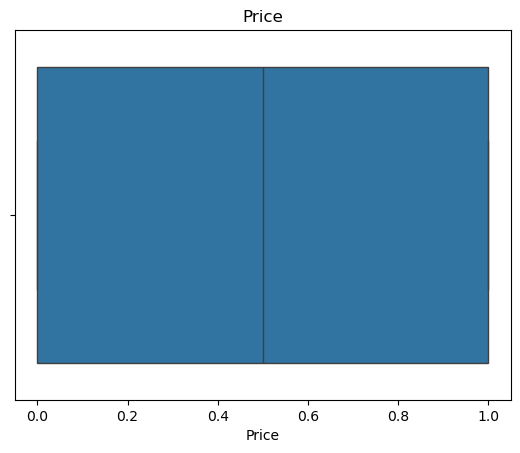

In [19]:
outliers(df)

In [22]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    LF = q1-(1.5*iqr)
    UF = q3+(1.5*iqr)
    print("LF-->",LF)
    print("UF-->",UF)

In [23]:
IQR(df["fc"])

LF--> -8.0
UF--> 16.0


In [24]:
df["fc"]= np.where(df["fc"]>16.0,16.0,df["fc"])

In [25]:
IQR(df['px_height'])

LF--> -714.0
UF--> 1944.0


In [26]:
df["px_height"]= np.where(df["px_height"]>1944.0,1944.0,df["px_height"])

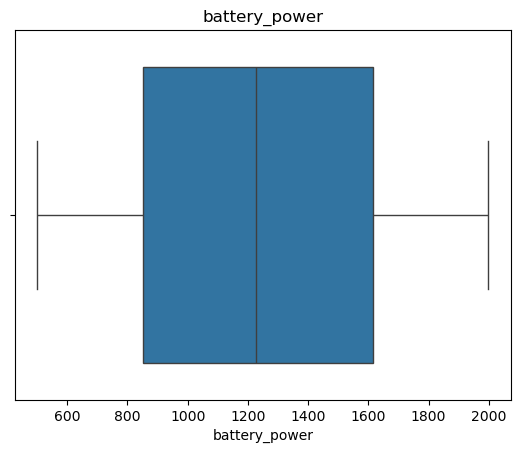

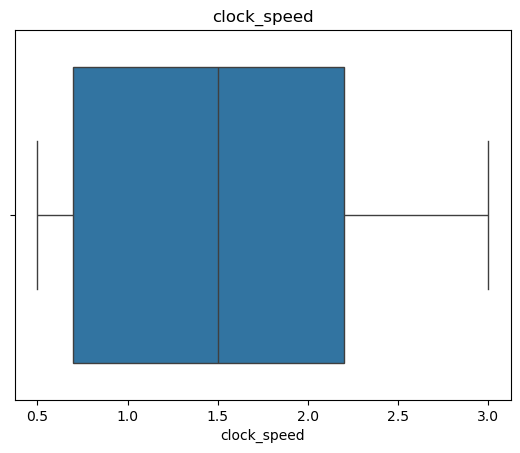

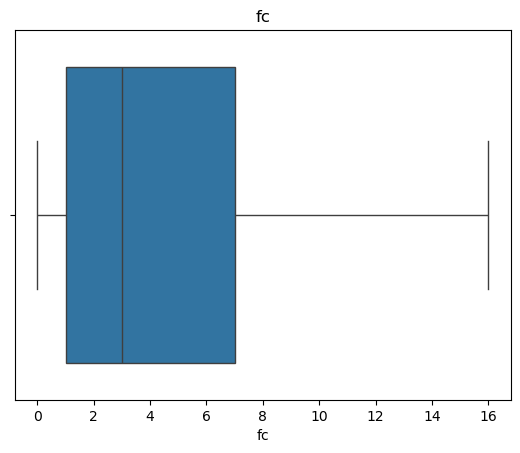

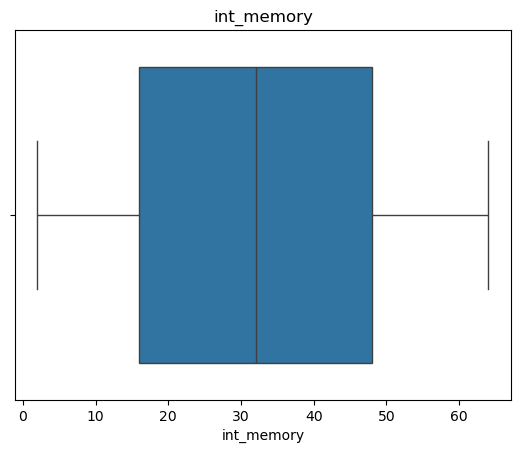

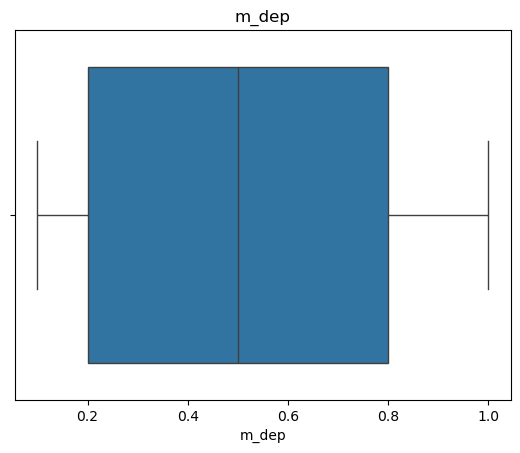

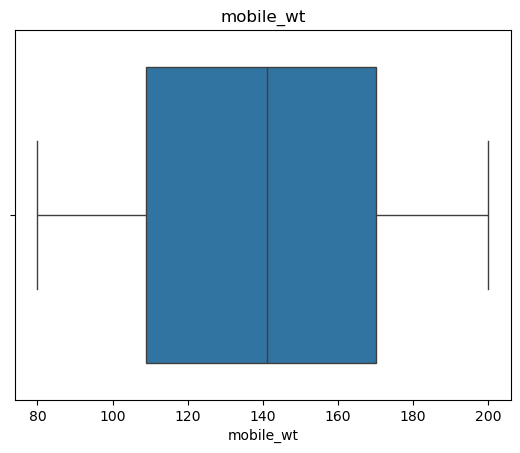

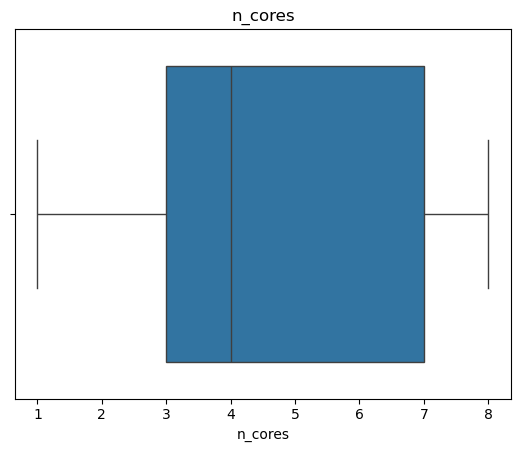

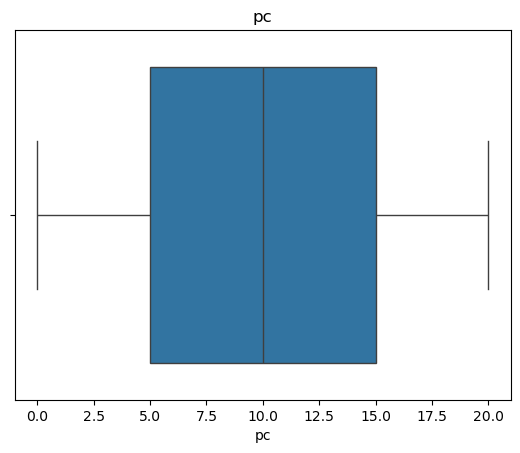

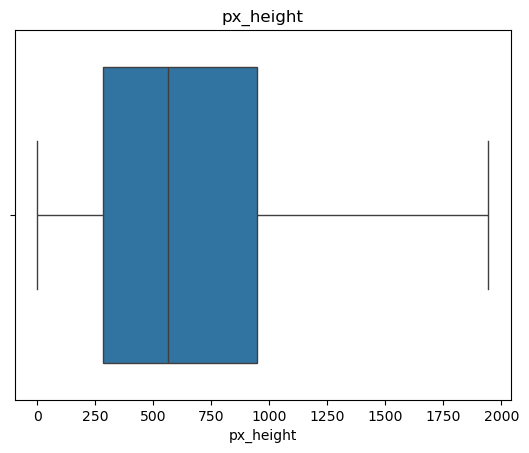

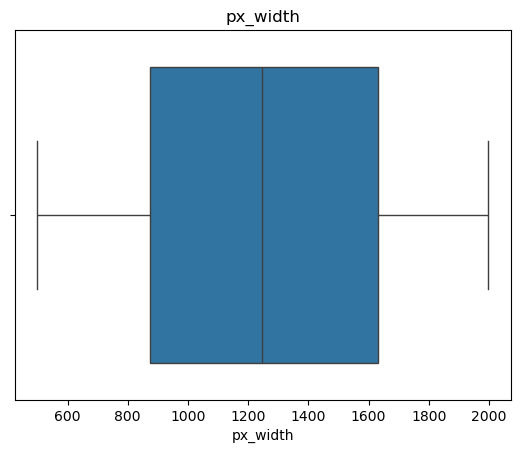

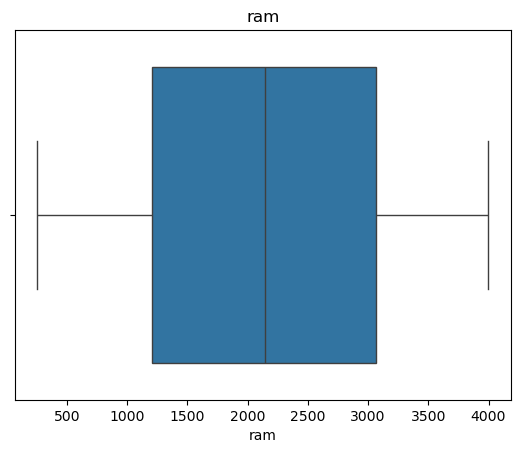

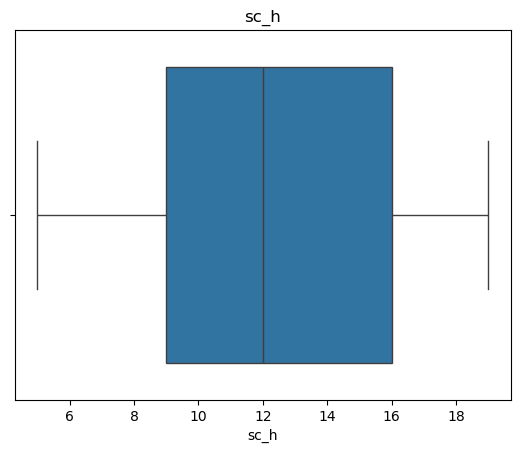

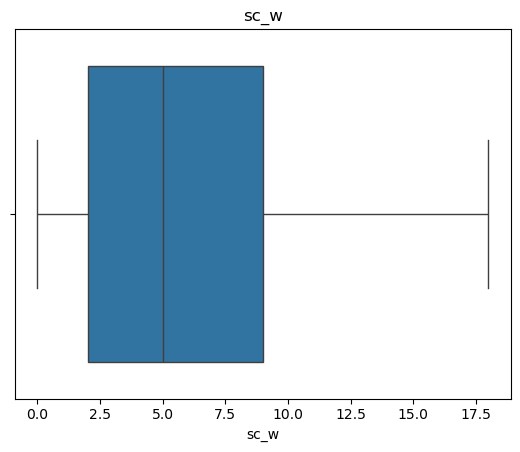

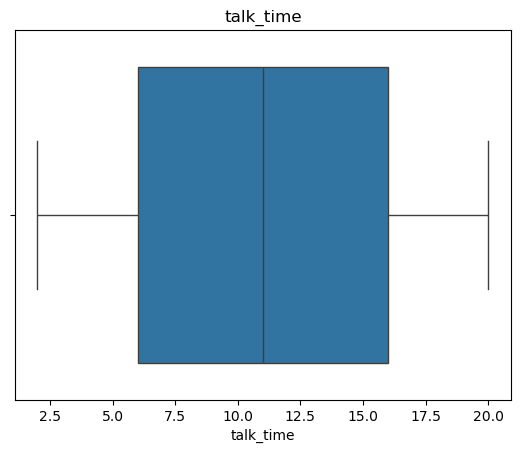

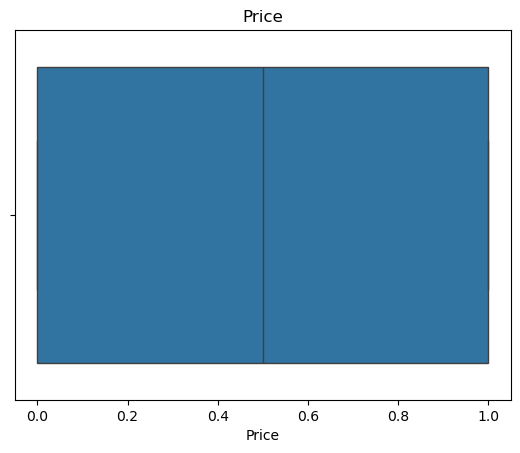

In [27]:
outliers(df)

In [28]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1.0,7,0.6,188,2,2,20.0,756,2549,9,7,19,0
1,1021,0.5,0.0,53,0.7,136,3,6,905.0,1988,2631,17,3,7,1
2,563,0.5,2.0,41,0.9,145,5,6,1263.0,1716,2603,11,2,9,1
3,615,2.5,0.0,10,0.8,131,6,9,1216.0,1786,2769,16,8,11,1
4,1821,1.2,13.0,44,0.6,141,2,14,1208.0,1212,1411,8,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0.0,2,0.8,106,6,14,1222.0,1890,668,13,4,19,0
1996,1965,2.6,0.0,39,0.2,187,4,3,915.0,1965,2032,11,10,16,1
1997,1911,0.9,1.0,36,0.7,108,8,3,868.0,1632,3057,9,1,5,1
1998,1512,0.9,4.0,46,0.1,145,5,5,336.0,670,869,18,10,19,0


In [30]:
x = df.drop(columns = 'Price')
y = df['Price']

In [62]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
print("Test",lr.score(x_test,y_test))
print(lr.score(x_train,y_train)) 

0.91
0.890625


In [75]:
KNN = KNeighborsClassifier()

In [76]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
print("Train",KNN.score(x_train,y_train))
print("Test",KNN.score(x_test,y_test))

Train 0.9825
Test 0.9725


In [84]:
from sklearn.preprocessing import MinMaxScaler
# this method is apply only on independent variable

In [87]:
scale = MinMaxScaler()

In [88]:
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

In [89]:
lr.fit(x_train_scale,y_train)

LogisticRegression()

In [91]:
print("Train",lr.score(x_train_scale,y_train))
print("Test", lr.score(x_test_scale,y_test))

Train 0.985625
Test 0.9825


In [94]:
KNN = KNeighborsClassifier(n_neighbors =9)
KNN.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=9)

In [95]:
print("Train",KNN.score(x_train_scale,y_train))
print("Test", KNN.score(x_test_scale,y_test))

Train 0.93375
Test 0.8925


In [98]:
train=[]
test=[]
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scale,y_train)
    train.append(knn.score(x_train_scale,y_train))
    test.append(knn.score(x_test_scale,y_test))

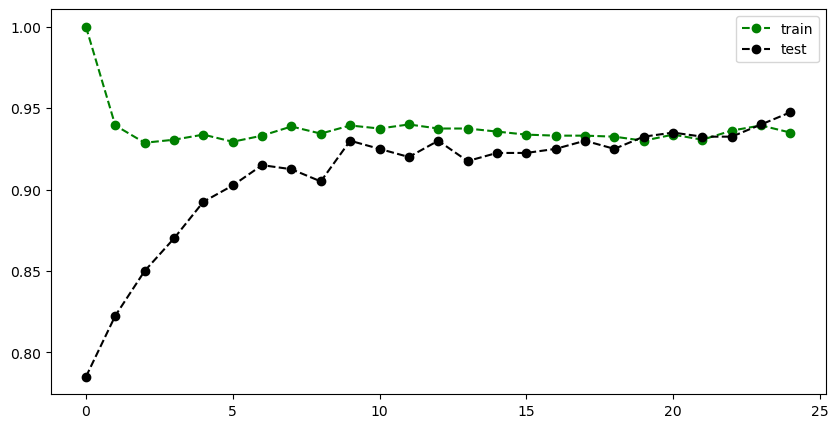

In [119]:
plt.figure(figsize=(10,5))
plt.plot(train,"o--",label ="train",color = "g")
plt.plot(test ,"o--",label ="test",color="k")
plt.legend()
plt.show()

In [116]:
KNN = KNeighborsClassifier(n_neighbors =23)
KNN.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=23)

In [117]:
print("Train",KNN.score(x_train_scale,y_train))
print("Test", KNN.score(x_test_scale,y_test))

Train 0.94
Test 0.92


In [1]:
from sklearn.metrics import classification_report
print(classification_report(y_train,knn.predict(x_train)))
print(classification_report(y_train,knn.predict(x_t)))

NameError: name 'y_train' is not defined